In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [67]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Data_Activity_Projection.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3,10,1
1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,3,8,0
2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,3,14,1
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,3,10,1
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,7,0


In [68]:
df1 = df0.drop(columns=["Sum_Skills_Off_ab_avg", "Total_Skills"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,10
1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,8
2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,14
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,10
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,7


In [69]:
print(df1.sum(axis=0))


Agriculture        101
Animal Care        105
Art                111
Beauty             112
Dance              141
Music              108
Writing            111
Language           115
Health             113
Sports             140
Food               124
Technology         118
Photo              124
Video              121
Sum_Skills_Off    7709
dtype: int64


In [70]:
df1.shape

(800, 15)

# 1. KNN regressor model

## 1.1 Model training (train-test-split not necessary)

In [71]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]
knn = KNeighborsRegressor(n_neighbors= 10)
y_pred = cross_val_predict(knn, X, y, cv =5)

In [72]:
y_pred

array([[ 8. ],
       [11.1],
       [10.9],
       [10.5],
       [11.4],
       [10.8],
       [ 9.7],
       [ 7.7],
       [11.4],
       [10.8],
       [11.7],
       [10.7],
       [10.4],
       [ 8.2],
       [11.2],
       [ 9.3],
       [ 8.4],
       [10.5],
       [11.4],
       [10.2],
       [10.1],
       [ 8.2],
       [10.8],
       [10. ],
       [10. ],
       [ 8.3],
       [10.5],
       [10.1],
       [ 7.7],
       [11.2],
       [ 9.5],
       [10.1],
       [10.1],
       [11.4],
       [11.5],
       [10.4],
       [10.7],
       [10.9],
       [ 9.4],
       [11.2],
       [11.2],
       [11.6],
       [ 9.6],
       [ 9.5],
       [ 8.1],
       [11.3],
       [ 8.9],
       [10.3],
       [12.5],
       [11.9],
       [10.5],
       [ 9.1],
       [ 8. ],
       [10.4],
       [ 9.1],
       [10.8],
       [10. ],
       [10.3],
       [10.1],
       [ 8.7],
       [ 6.5],
       [ 9. ],
       [10.1],
       [ 9.3],
       [ 9.4],
       [ 6.5],
       [10

In [73]:
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

17.7245375
4.210051959299315
-0.11500071900943976


In [74]:
error = []
for k in range (1,100):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X,y, cv=5)
    error.append(mean_squared_error(y,y_pred))

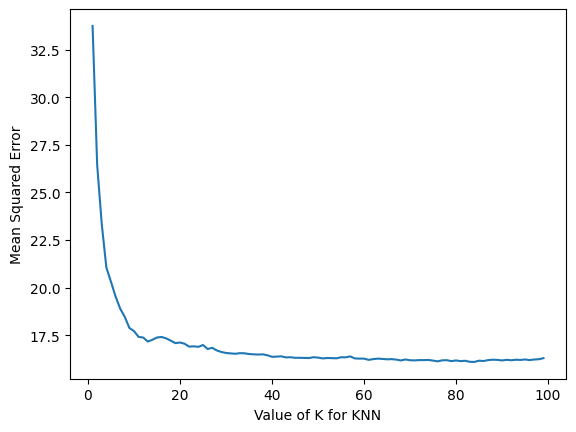

In [75]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.plot(range(1,100),error)

## 1.2 Scaling

In [76]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [77]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)

print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))

18.0533875
4.248927805929397
-0.13568774604448985


In [78]:
error_scaled = []
for k in range (1,100):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
    error_scaled.append(mean_squared_error(y,y_pred))

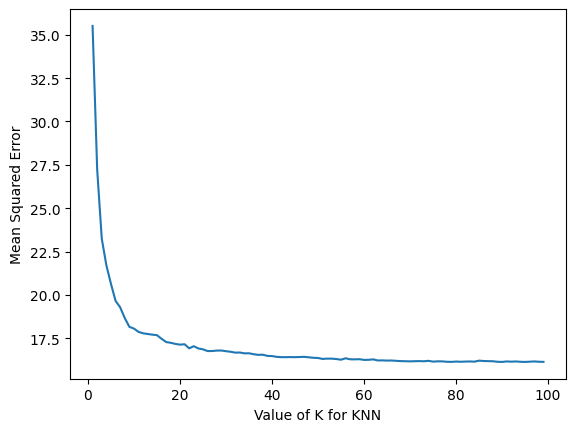

In [79]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.plot(range(1,100),error_scaled)

## 1.3 Cross validation / Hyperparameter tuning

In [80]:
cv = KFold(n_splits=5, random_state= None, shuffle=False) 

### Find best k-value (lowest mse)

In [81]:
# Number of training samples used to train the model 
n_samples_fit

800

In [82]:
# Max k value in cross validation model (approximately 80/20 train-test-split in each fold as cv=5)
max_k = int(0.8 * n_samples_fit)
max_k

640

In [92]:
# Find best k-value
k_values = range(1,max_k)

mse_scores = []

for k in k_values:
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    mse = -cross_val_score(classifier_pipeline, X, y, cv=cv, scoring='neg_mean_squared_error').mean()    
    mse_scores.append(mse)

best_k_index = mse_scores.index(min(mse_scores))

best_k = k_values[best_k_index]

print("Best k:", best_k)
print("Best mse:", mse_scores[best_k_index])


Best k: 635
Best mse: 15.982514287928577


In [95]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=635))
y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))


15.982514287928575
3.997813688496323
-0.005414946518012442


## 1.4 Train model with a (random) k-value that is smaller than best k-value 635 (lowest mse) 

### Goal: In the flask application from the folder DS\02_Application_Code\01_Activity_Status_Flask, we want to achieve different predictions for different skill portfolios for demonstration purposes.
### --> Due to the structure of the synthetic data set, a k-value of 635 would produce the same prediction for every skill set as it predicts the mean of all instances in the training data. We decided to pick 12 as a random k-value because it leads to varying predictions.

In [102]:
final_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=12))
y_pred = cross_val_predict(final_model, X, y, cv=5)
final_model.fit(X, y)

print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))

17.781770833333333
4.21684370511089
-0.118601106766693


# 2. Prepare model for API 

In [103]:
import pickle

In [104]:
with open('Activity_Projection_Model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
